**BUSINESS PROPOSAL: AVIATON RISK ANALYSIS**

**Business Understanding**

    Our comapny is considering investing in aircraft for both commercial and private use. 
    Given the inherent riskas assocaited with aviation example, accidents, equipment failure and external factors, a comprehensive risk assessment is necessary.
    This proposal outlines data driven approach to evaluate aviation safety based on historical accident data.
    This will help us identify aircraft models with the lowest risk profiles and  factors contributing to aviation accidents.
    
**Business Problem**

    Investing in aircraft presents significant finacial and operational risks.
    Aviation accidents can lead to high costs, reputational damage and legal challenges.
    currently our company needs to understand:
             1. Which aircraft models have the lowest accident rates.
             2. The most common risk facotrs leading to accidents, eg weather, human error, mechanical failure.
             3. How data driven analysis can reduce the risk of investment.
    By using historical accident data, this project aims to provide actionable insights that guide decision making and risk mitigation for aircraft investment.



    ** Data Understanding**

**Dataset Overview**

   The data source for this project is from the National Transport Safety Board(NTSB) from 1962-2023.
   This data includes details about the aircraft involved, accident location, severity and potential causes.

**Data Exploration**

  This will be done in stages:
           1. we will be checking for missing data and clean the dataset
           2. Identify trends in the dataset
           3. Eplore different relationships within the datase

**Data Analysis**

Key things to be addressed;
           1. Which aircraft models have thelowst amd highest accident rates, including fatal and serious injuries.
           2. What role do weather conditions play in causing aviaiton accidents.
           3. How do accidents vary across different phases of flight?
           4. What can historical data tell us about future aviation safety?
           

In [5]:
import pandas as pd

# Load aviation accident dataset with encoding fix
aviation_df = pd.read_csv("Dataset/AviationData.csv", encoding="latin1")  

# Load U.S. state codes dataset
state_codes_df = pd.read_csv("Dataset/USState_Codes.csv", encoding="latin1")  

# Preview the first few rows
print("Aviation Data Preview:")
print(aviation_df.head())

print("\nState Codes Preview:")
print(state_codes_df.head())


C:\Users\hp\AppData\Local\Temp\ipykernel_10812\3819437123.py:4: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_df = pd.read_csv("Dataset/AviationData.csv", encoding="latin1")


Aviation Data Preview:
         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude  Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN        NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN        NaN          NaN   
2    Saltville, VA  United States  36.922223 -81.878056          NaN   
3       EUREKA, CA  United States        NaN        NaN          NaN   
4       Canton, OH  United States        NaN        NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN            

**Data Cleaning**
Start by finding missing values


In [29]:
# dataset columns
aviation_df = pd.read_csv("Dataset/AviationData.csv", encoding="latin1")


C:\Users\hp\AppData\Local\Temp\ipykernel_10812\2607601074.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_df = pd.read_csv("Dataset/AviationData.csv", encoding="latin1")


In [30]:
# Display the number of missing values in each column
missing_values = aviation_df.isnull().sum()

# Show only columns with missing data
missing_values = missing_values[missing_values > 0]

# Print the columns with missing values
print("Columns with missing data:")
print(missing_values)


Columns with missing data:
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: int64


In [31]:
#Dropping columns with large missing values
columns_to_drop = ["Latitude", "Longitude", "Airport.Code", "Airport.Name", "Aircraft.Category",
                   "FAR.Description", "Schedule", "Air.carrier"]
existing_columns = set(aviation_df.columns)
aviation_df.drop(columns=[col for col in columns_to_drop if col in existing_columns], inplace=True)


In [32]:
#Filling missing values with "Unknown"
aviation_df.fillna("Unknown", inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_10812\1405109344.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  aviation_df.fillna("Unknown", inplace=True)


In [33]:
#To check if any missing values remain
print(aviation_df.isnull().sum())


Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64


In [41]:
# Converting fatal injuries column to interger type
aviation_df["Total.Fatal.Injuries"] = pd.to_numeric(aviation_df["Total.Fatal.Injuries"], errors="coerce")


fatal_models = aviation_df[aviation_df["Total.Fatal.Injuries"] > 0]["Model"].value_counts().head(10)
print("\nTop 10 Aircraft Models with Most Fatal Accidents:")
print(fatal_models)



Top 10 Aircraft Models with Most Fatal Accidents:
Model
152          251
172          212
172N         204
PA-28-140    182
A36          159
PA-28-180    143
PA-28-181    138
172M         132
R44          132
206B         118
Name: count, dtype: int64


In [42]:
# counting top 10 aircraft models with most recorded accidents
top_models = aviation_df["Model"].value_counts().head(10)
print("Top 10 Aircraft Models with Most Recorded Accidents:")
print(top_models)

# Counting top 10 aircraft manufacturers with most recorded accidents
fatal_models = aviation_df[aviation_df["Total.Fatal.Injuries"] > 0]["Model"].value_counts().head(10)
print("\nTop 10 Aircraft Models with Most Fatal Accidents:")
print(fatal_models)


Top 10 Aircraft Models with Most Recorded Accidents:
Model
152          2367
172          1756
172N         1164
PA-28-140     932
150           829
172M          798
172P          689
182           659
180           622
150M          585
Name: count, dtype: int64

Top 10 Aircraft Models with Most Fatal Accidents:
Model
152          251
172          212
172N         204
PA-28-140    182
A36          159
PA-28-180    143
PA-28-181    138
172M         132
R44          132
206B         118
Name: count, dtype: int64


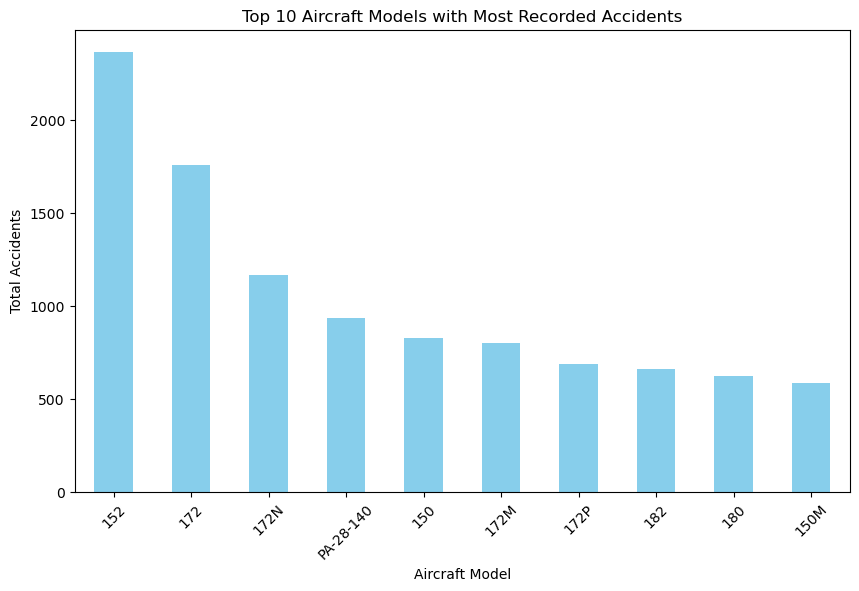

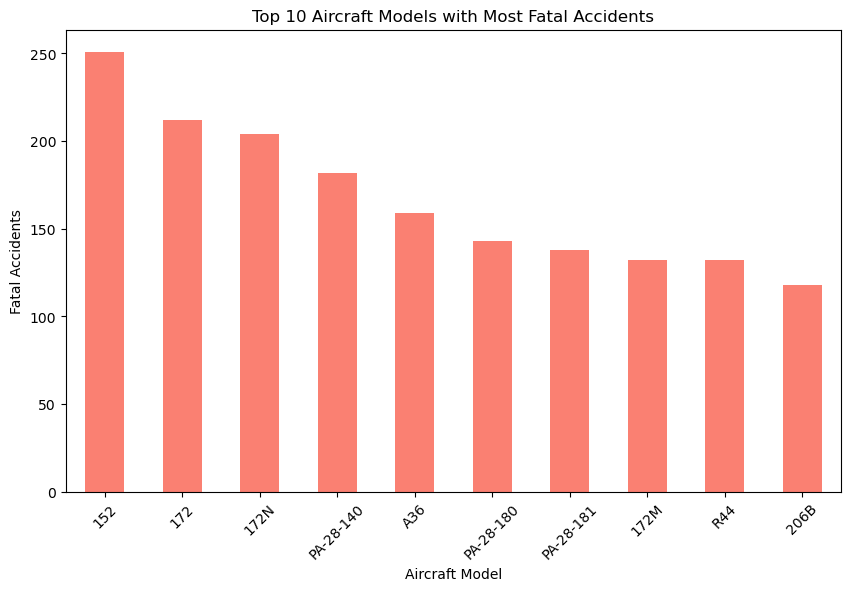

In [49]:
#Visualizing the data

import matplotlib.pyplot as plt

# Select top 10 models with most accidents
top_models = aviation_df["Model"].value_counts().head(10)
fatal_models = aviation_df[aviation_df["Total.Fatal.Injuries"] > 0]["Model"].value_counts().head(10)

# Plot total accident chart
plt.figure(figsize=(10, 6))
top_models.plot(kind="bar", color="skyblue")
plt.xlabel("Aircraft Model")
plt.ylabel("Total Accidents")
plt.title("Top 10 Aircraft Models with Most Recorded Accidents")
plt.xticks(rotation=45)
plt.show()

# Plot fatal accident chart
plt.figure(figsize=(10, 6))
fatal_models.plot(kind="bar", color="salmon")
plt.xlabel("Aircraft Model")
plt.ylabel("Fatal Accidents")
plt.title("Top 10 Aircraft Models with Most Fatal Accidents")
plt.xticks(rotation=45)
plt.show()


 **What the data above tells us**
Model 152 and model 172 appears in both lists, meaning they have had a high accident frequency but also a significant number of fatal incidents.

PA-28-140 and A36 are also among the top fatal accident models, suggesting potential safety concerns in specific aircraft types.

R44 (a helicopter) appearing in the fatal accident list indicates that rotorcraft may have unique risk factors compared to fixed-wing aircraft.

In [43]:
# Investigating factors contibuting to accidents
aviation_df["Weather.Condition"].value_counts()


Weather.Condition
VMC        77303
IMC         5976
Unknown     4492
UNK          856
Unk          262
Name: count, dtype: int64

In [44]:
# Investigating how weather conditions affect accident severity
aviation_df.groupby("Weather.Condition")[["Total.Fatal.Injuries"]].sum()


,Total.Fatal.Injuries
Weather.Condition,
IMC,11824.0
UNK,2407.0
Unk,326.0
Unknown,10086.0
VMC,25558.0


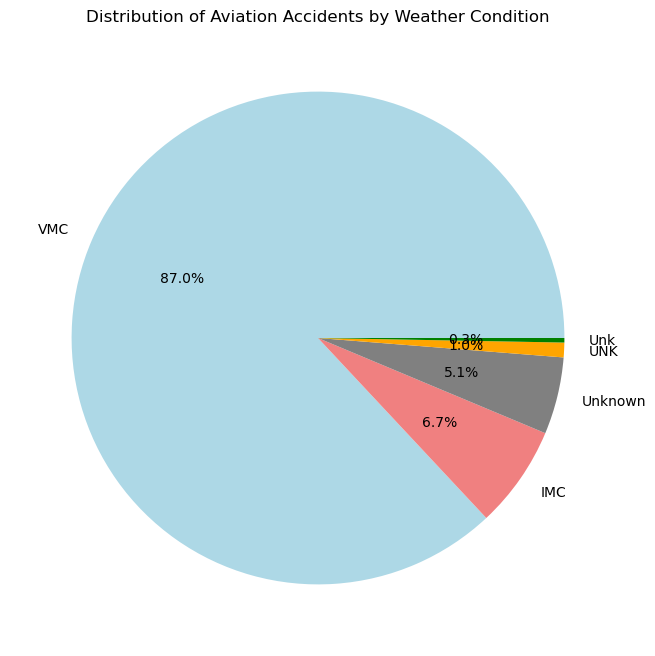

In [50]:
#Visualizing the data
# Count occurrences of each weather condition
weather_counts = aviation_df["Weather.Condition"].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
weather_counts.plot(kind="pie", autopct="%1.1f%%", colors=["lightblue", "lightcoral", "gray", "orange", "green"])
plt.title("Distribution of Aviation Accidents by Weather Condition")
plt.ylabel("")  # Hide the y-label for better formatting
plt.show()


**Key takeaways from the dataset above**
The weather condition analysis highlights a strong dominance of VMC  in accident records, but IMC  still presents a notable risk. Here’s what we can derive:
1.**VMC** Most accidents happen in clear weather, suggesting factors beyond poor visibility (e.g., human error or mechanical failure).

2. **IMC** These incidents likely involve low visibility, fog, storms, or night conditions where pilots rely on instruments.IMC incidents may signal navigation difficulties or reliance on autopilot systems.
3.**UNK and Unk** some entries are marked "Unknown", meaning data gaps exist in recorded weather conditions.

In [45]:
# Analysisng flight phase risks
aviation_df["Broad.phase.of.flight"].value_counts()


Broad.phase.of.flight
Unknown        27713
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Other            119
Name: count, dtype: int64

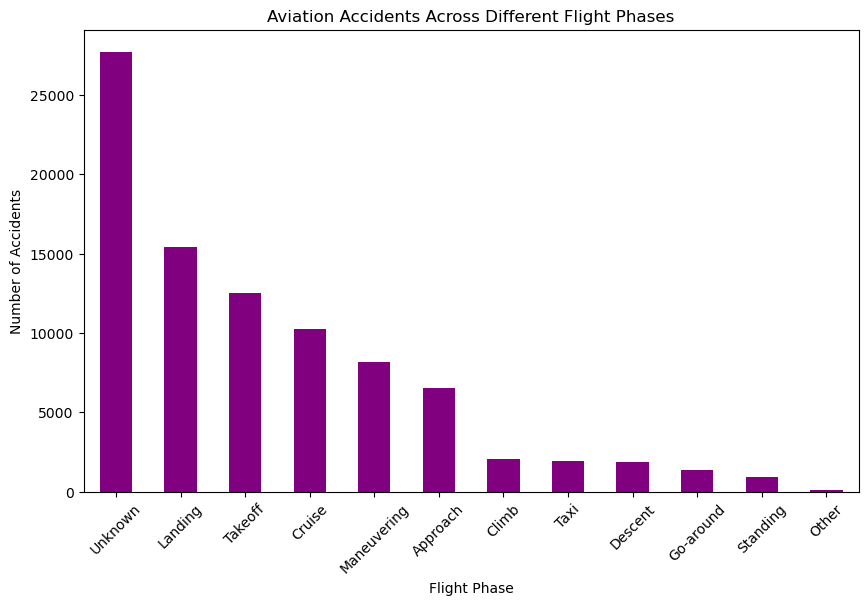

In [51]:
# Flight phase accident count
flight_phase_counts = aviation_df["Broad.phase.of.flight"].value_counts()

# Plot flight phase accident chart
plt.figure(figsize=(10, 6))
flight_phase_counts.plot(kind="bar", color="purple")
plt.xlabel("Flight Phase")
plt.ylabel("Number of Accidents")
plt.title("Aviation Accidents Across Different Flight Phases")
plt.xticks(rotation=45)
plt.show()


**What we can learn from the data above**
1.Landing and takeoff hold the highest risk out of the phases.
2.Cruise phase should theoretically be the safest phase has a high risk.This suggests thst technical reliability plays a critical role in risk mitigation.
3.Unknown records needs furthr investigation. This indicates data inconsistencies or cases of flight phase data being unavailable.


In [46]:
aviation_df["Aircraft.damage"].value_counts()


Aircraft.damage
Substantial    64148
Destroyed      18623
Unknown         3313
Minor           2805
Name: count, dtype: int64

In [47]:
# Coorelating damge severity with fatality rates
aviation_df.groupby("Aircraft.damage")[["Total.Fatal.Injuries"]].sum()


,Total.Fatal.Injuries
Aircraft.damage,
Destroyed,40778.0
Minor,288.0
Substantial,7896.0
Unknown,1239.0


This suggests a strong correlation between aircraft damge severity and fatal injuries

Matplotlib is building the font cache; this may take a moment.


<Figure size 800x600 with 0 Axes>

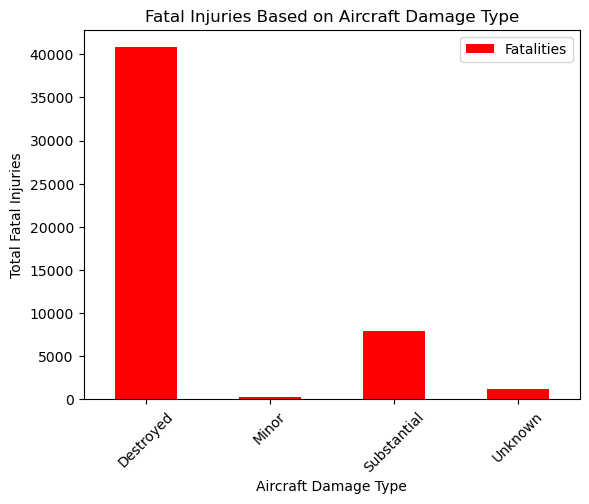

In [48]:
# Visualizing aircraft damage severity and fatality rates
import matplotlib.pyplot as plt

# Create a bar chart for fatal injuries by aircraft damage
damage_fatalities = aviation_df.groupby("Aircraft.damage")[["Total.Fatal.Injuries"]].sum()

plt.figure(figsize=(8, 6))
damage_fatalities.plot(kind="bar", color=["red", "gold", "blue", "gray"])
plt.xlabel("Aircraft Damage Type")
plt.ylabel("Total Fatal Injuries")
plt.title("Fatal Injuries Based on Aircraft Damage Type")
plt.xticks(rotation=45)
plt.legend(["Fatalities"])
plt.show()


** Business Summary**
Actionable insights from the analysis above:

**Business Recommendations**

1.Investors should prioritize aircraft models with strong safety records and low fatality rates.

2.Human error, technical failures, landing and takeoff procedures contribute more to aviation risk than weather alone. There should be a huge focus on pilot training and aircraft maintenance. Enhance navigation systems for maneuvering operations.

3. Develop standardized emergency response protocols for weather related incidents. 

4. Conduct regular maintenance checks and strenghten insepection standards for aircrafts.

5. Use historical dat to guide investment decisions and risk assessments. Monitor aviation trends to adjust purchasing strategies.



